# Worked Problem Assignment 7

### <p style="text-align: right;">  Kyle Taft

## Background

In class we had a lot of dicussion over the use of coding to numerical solve statistical mechanics problems. Specifically we looked into bring two box with N particles and q oscillators each into thermal contact. We found that the probability of finding the systems in a specific macrostate of number of quanta per box being proportional to the number of oscillators was extremely more likely than any other macrostate. In this project, as mentioned in class, I will be bring the problem into higher dimensions and higher values of oscillators/quanta and discuss the similarities and differences this brings.

## Code Implementation

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

Here I take a big step in the direction of the generalization that we want to perform. The function that I have developed below takes in the oscillators in each box and the total number of quanta. It then every possible combination of the number of quanta in each box. This is what we would usually do in a loop.

In [2]:
def find_series(N, M):
    # Creates a list of N arrays of sequence 0, M
    sequences = [np.arange(M + 1)] * len(N) 

    # Creates a list of all possible combinations of the sequences
    combinations = np.array(np.meshgrid(*sequences)).T.reshape(-1, len(N)) 

    # Filter combinations that sum up to M
    valid_combinations = combinations[combinations.sum(axis=1) == M]

    return valid_combinations

# Example (2 Boxes and 5 Quanta)
find_series([2,3],4)

array([[0, 4],
       [1, 3],
       [2, 2],
       [3, 1],
       [4, 0]])

Now with implementing the equation we derived in class:

$$\Omega = \dfrac{(q+N-1)!}{q!(N-1)!}$$

We can find the number of microstates for each macrostate. We then find the probability of each macrostate by dividing the number of microstates by the total number of microstates. We then plot the probability of each macrostate as a function of the number of quanta in each box for the 2D cases to simplify plotting. To bring to higher dimensions we have the code to do so, but it is not easy to visualize.

Addditionally, I modify the function in num_combo2 to use the log of the factorial to avoid overflow errors. I found this using the numpy documentation.

In [3]:
# Equation from class
def num_combo(N, q):
    return np.math.factorial(q+N-1)/(np.math.factorial(q)*np.math.factorial(N-1))

# Modified equation 
def num_combo2(N, q):
    # Using the logarithmic form of the factorial to avoid overflow
    return np.math.lgamma(q + N) - np.math.lgamma(q + 1) - np.math.lgamma(N)

Most probable state:  62
Probability of finding 11 - 112 quanta in system 1:  0.999999997062652


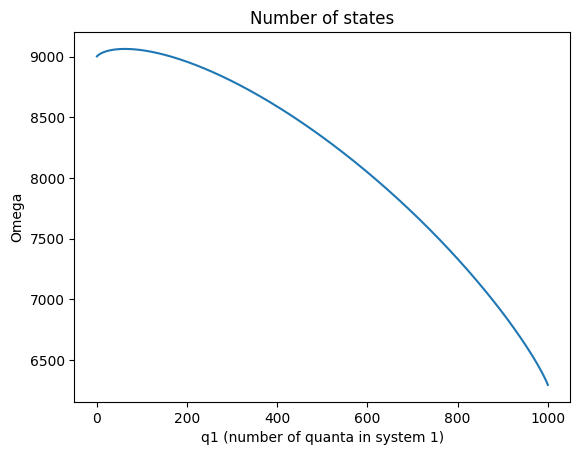

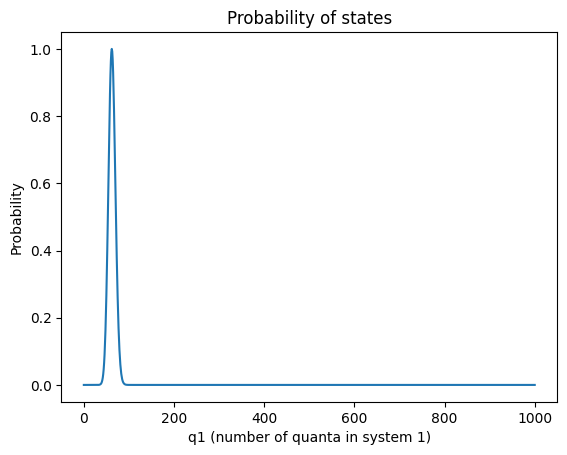

In [26]:
# 2D Example (2 Boxes and 1000 Quanta)
N1 = 200000 
N2 = 3000000
q = 1000
omega = []

for qs in find_series([N1,N2],q): # loop through all possible combinations and calculate the number of combinations
    #omega.append(num_combo(N1,qs[0])*num_combo(N2,qs[1]))
    omega.append(num_combo2(N1,qs[0]) + num_combo2(N2,qs[1]))

plt.figure()
plt.plot(omega)
plt.xlabel('q1 (number of quanta in system 1)')
plt.ylabel('Omega')
plt.title("Number of states")

probs = np.exp(omega - np.max(omega)) # convert omega to probabilities (I found this method looking through a few websites online)

plt.figure()
plt.plot(probs)
plt.xlabel('q1 (number of quanta in system 1)')
plt.ylabel('Probability')
plt.title("Probability of states")

max_probs = np.argmax(probs)
lb = int(max_probs-0.05*len(probs))
ub = int(max_probs+0.05*len(probs))
print("Most probable state: ", max_probs)

print(f"Probability of finding {lb} - {ub} quanta in system 1: ", np.sum(probs[lb:ub]/np.sum(probs)))


Here, using the logarithmic approx of the factorial, we are able to quite freely change N1, N2, and q to see how the probability of each macrostate changes. We can start to develop an intuition for how when we approach having something on the scale of $10^{23}$ particles, the probability of finding the system in any other macrostate than the one that is most likely is essentially zero.

## Conclusions

With the code and functions that I set up above we now can explore this statistical mechanics problem in both higher dimensions and much higher values of particles and quanta. We can see that the probability of finding the system in the most likely macrostate is extremely high. We can also see that as we increase the number of quanta, the probability of finding the system in any other macrostate than the most likely one is essentially zero. This is the results that we would expect out of stat mech in order to describe thermal equilibrium of a system. If we the systems around us did not behave in this way, our world would not be stable and we would not be able to exist.